In [133]:
# imPORT LIBRARIES 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from math import pi, sqrt
import handcalcs.render
import pandas as pd
import json 
# !pip install handcalcs

In [134]:
# CONFIGURATIONS
#help(handcalcs.set_option)
handcalcs.set_option("latex_block_start", "$")
handcalcs.set_option("latex_block_end", "$")
handcalcs.set_option("math_environment_end", "aligned")
handcalcs.set_option("use_scientific_notation",True)

## Inputs and claculated parameters

In [135]:
with open("../01_llc_tank/04_outputs/inp_datas.json", "r", encoding="utf-8") as f:
    inp_datas = json.load(f)
print("Input datas:")
print("="*20)
display(inp_datas)

with open("../01_llc_tank/04_outputs/out_results.json", "r", encoding="utf-8") as f:
    out_datas = json.load(f)
print("Output datas:")
print("="*20)
display(out_datas)


# Load variables fsw_max
for key, value in inp_datas.items():
    globals()[key] = value
for key, value in out_datas.items():
    globals()[key] = value

Input datas:


{'V_In_min': 360.0,
 'V_In_nom': 380.0,
 'V_In_max': 400.0,
 'Vo_min': 42.0,
 'Vo_nom': 48.0,
 'Vo_max': 54.0,
 'Power': 1200.0,
 'f_nom': 100000.0}

Output datas:


{'Lnc': 3.0,
 'Qec': 0.55,
 'Cr_nF': 116.209,
 'n': 4.0,
 'Lr_uH': 21.797,
 'Lm_uH': 65.392,
 'fsw_min': 60170.0,
 'fsw_max': 156220.0,
 'Im_rms': 6.992,
 'Io': 25.0,
 'Ioe_rms': 7.636,
 'Ios_rms': 30.545,
 'Ir_rms': 10.354,
 'L_second_uH': 4.087,
 'Re_nom': 24.901,
 'Re_110': 22.637,
 'Cr': 1.16209e-07,
 'Lr': 2.1796999999999998e-05,
 'Lm': 6.539199999999999e-05}

In [136]:
# PRIMARY
#IPW60R060C7XKSA1
#https://www.mouser.fr/datasheet/2/196/Infineon_IPW60R060C7_DS_v02_00_EN-1731945.pdf
#https://www.mouser.fr/ProductDetail/Infineon-Technologies/IPW60R060C7XKSA1?qs=QIiuLP2W41BeappdMvA3rg%3D%3D


# SECONDARY 
# IRF150P221AKMA1
# https://eu.mouser.com/ProductDetail/Infineon-Technologies/IRF150P221AKMA1?qs=iLbezkQI%252BsgFvQ9qK7vaNg%3D%3D
# https://eu.mouser.com/datasheet/2/196/Infineon_IRF150P221_DataSheet_v02_02_EN-3362781.pdf

# pRIMARY

In [137]:
# PRIMARY
#IPW60R060C7XKSA1
#https://www.mouser.fr/datasheet/2/196/Infineon_IPW60R060C7_DS_v02_00_EN-1731945.pdf
#https://www.mouser.fr/ProductDetail/Infineon-Technologies/IPW60R060C7XKSA1?qs=QIiuLP2W41BeappdMvA3rg%3D%3


# Gate charge total Qg - 68 - nC VDD=400V,ID=15.9A,VGS=0to10V

# driver Si82394AD-IS

https://eu.mouser.com/datasheet/2/472/si8239x_data_sheet-2507466.pdf


Si82394AD-IS
Si82394AD-IS Si82394AD-AS 6 V No Yes Yes 10–200 ns No SOIC-16 WB


https://eu.mouser.com/ProductDetail/Skyworks-Solutions-Inc/SI82394AD-IS?qs=6OIXIgk3fwdbjfmmvh8oXQ%3D%3D

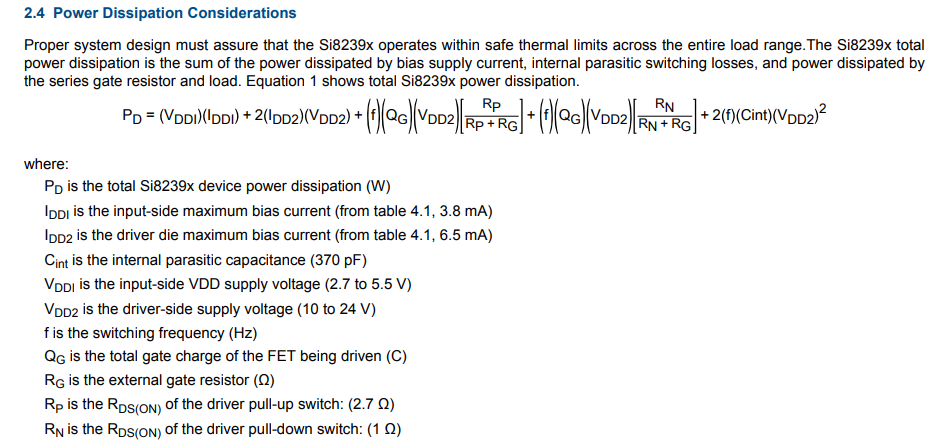

In [186]:
from copy import copy
def Pd_cal( Rp = 2.7, Rn = 1, Cint = 370e-12, **params):
    Vddi = params["Vddi"]
    Iddi = params["Iddi"]
    Idd2 = params["Idd2"]
    Vdd2 = params["Vdd2"]
    f = params["f"]
    Qg = params["Qg"]
    Rg = params["Rg"]
    #Pd =Vddi*Iddi+2*Idd2*Vdd2+f*Qg*Vdd2*Rp/(Rp+Rg)+f*Qg*Vdd2*Rn/(Rn+Rg)+2*f*Cint*Vdd2**2
    Pd = (
        Vddi*Iddi                                  # Static power from Vddi supply
        + 2*Idd2*Vdd2                              # Static power from Vdd2 supply (×2 channels?)
        + f*Qg*Vdd2*Rp/(Rp+Rg)                     # Switching loss during pull-up
        + f*Qg*Vdd2*Rn/(Rn+Rg)                     # Switching loss during pull-down
        + 2*f*Cint*Vdd2**2                         # Capacitive switching loss from internal capacitance
    )

    return Pd

params = {
    "Vddi": 5,          
    "Iddi": 3.8e-3,
    "Idd2": 6.5e-3,
    "Vdd2": 12,
    "f": 160e3,
    "Qg": 62e-9,
    "Rg": 3
}

inp = []
out = []

for Vddi in (5,3.3):
    for Vdd2 in (10,12,15):
        params["Vddi"]=Vddi
        params["Vdd2"]= Vdd2
        
        Pd = Pd_cal( Rp = 2.7, Rn = 1, Cint = 370e-12, **params)  
        inp.append(copy(params))
        out.append(Pd)



dfpd = pd.DataFrame(inp)
dfpd["Pd"]=out
dfpd

,Vddi,Iddi,Idd2,Vdd2,f,Qg,Rg,Pd
0,5.0,0.0038,0.0065,10,160000.0,6.200000e-08,3,0.232629
1,5.0,0.0038,0.0065,12,160000.0,6.200000e-08,3,0.278197
2,5.0,0.0038,0.0065,15,160000.0,6.200000e-08,3,0.348324
3,3.3,0.0038,0.0065,10,160000.0,6.200000e-08,3,0.226169
4,3.3,0.0038,0.0065,12,160000.0,6.200000e-08,3,0.271737
5,3.3,0.0038,0.0065,15,160000.0,6.200000e-08,3,0.341864


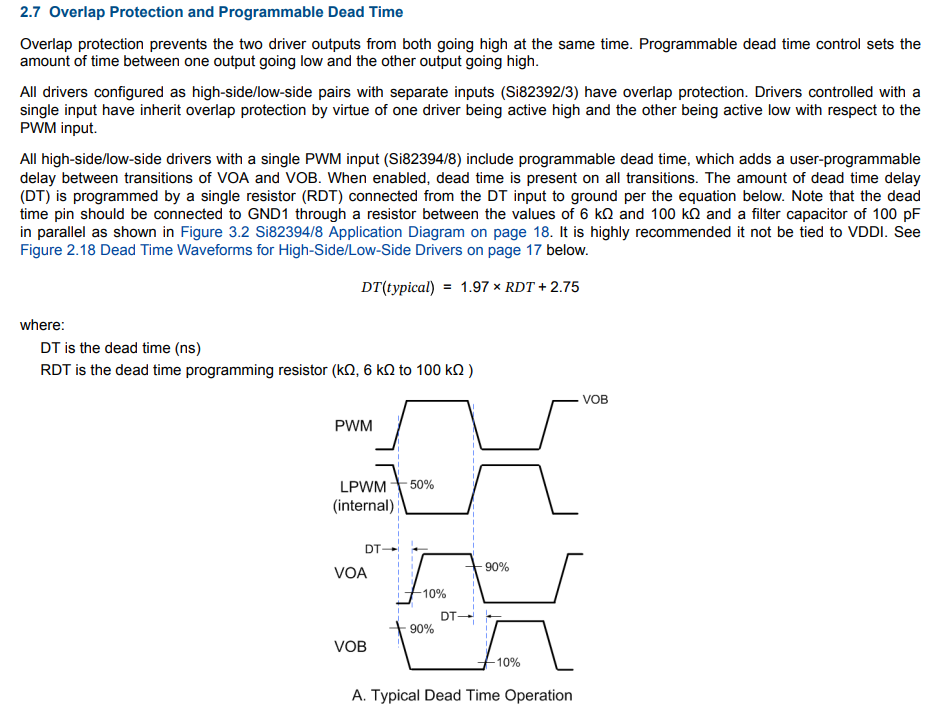

In [139]:
for RDT in [6,10,20,30,50,100]:
    DT = 1.97*RDT+2.75
    print(f"RDT {RDT} kOhm => DT (typ) = {DT} ns")

RDT 6 kOhm => DT (typ) = 14.57 ns
RDT 10 kOhm => DT (typ) = 22.45 ns
RDT 20 kOhm => DT (typ) = 42.15 ns
RDT 30 kOhm => DT (typ) = 61.85 ns
RDT 50 kOhm => DT (typ) = 101.25 ns
RDT 100 kOhm => DT (typ) = 199.75 ns


In [140]:
%%render 
Pdmax = dfpd.Pd.max() # W
Rth = 59 # °C/W Table 4.7. Thermal Characteristic
Ta=25
Tj = Pdmax*Rth+Ta
Tjmax = 150
Delta_Tj_Margin = 35
Tjmax_marg= Tjmax-Delta_Tj_Margin
Ta_max = Tjmax_marg-Pdmax*Rth # °C 

<IPython.core.display.Latex object>

In [141]:
def Ta_max_cal(Pd):
    Rth = 59 # °C/W Table 4.7. Thermal Characteristic
    Tjmax = 150
    Delta_Tj_Margin = 35
    Tjmax_marg= Tjmax-Delta_Tj_Margin
    Ta_max = Tjmax_marg-Pd*Rth # °C 
    return Ta_max
dfpd["Ta_max"]=dfpd.Pd.apply(lambda x:Ta_max_cal(x))
dfpd

,Vddi,Iddi,Idd2,Vdd2,f,Qg,Rg,Pd,Ta_max
0,5.0,0.0038,0.0065,12,160000.0,6.200000e-08,3,0.278197,98.586379
1,3.3,0.0038,0.0065,12,160000.0,6.200000e-08,3,0.271737,98.967519
2,5.0,0.0038,0.0065,10,160000.0,6.200000e-08,3,0.232629,101.274861
3,5.0,0.0038,0.0065,15,160000.0,6.200000e-08,3,0.348324,94.448872


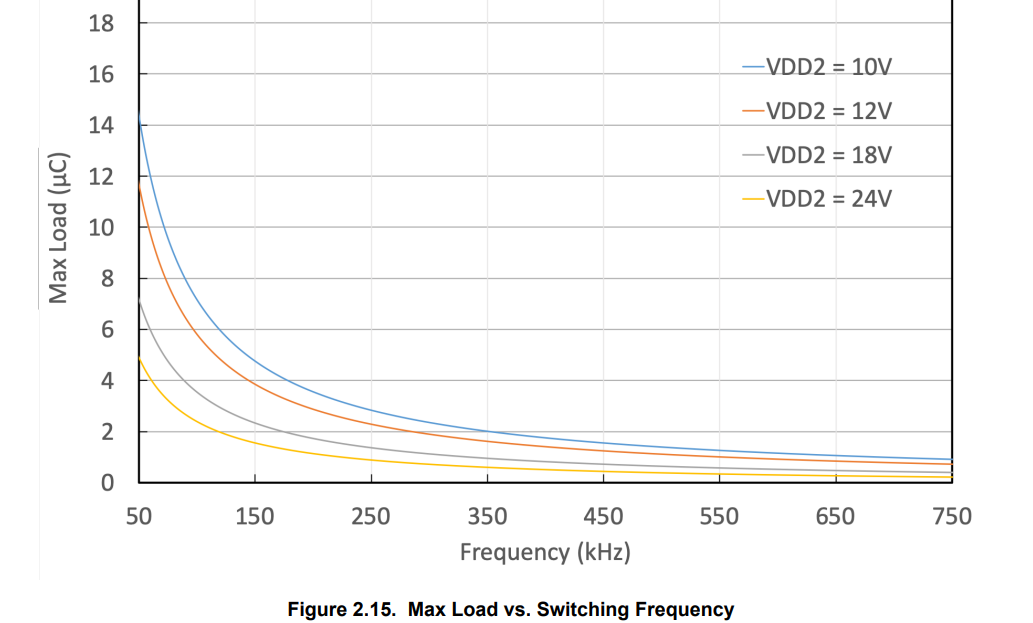

for 150kHz and VDD2= 18V the max load is around 2.3uC our Qg is around 68nC ==> OK 

In [142]:
%%render 
# formula see 
# https://www.ti.com/lit/ml/slua618a/slua618a.pdf?ts=1753874444277&ref_url=https%253A%252F%252Fwww.google.com%252FQg_ns= 68
Vdrive=12
Qg_ns=68
fsw_max
P_gate=Vdrive*fsw_max*Qg_ns*1e-9 # W

<IPython.core.display.Latex object>

In [143]:
%%render 
R_gi=0.8 

<IPython.core.display.Latex object>

In [144]:
%%render 
Rpd = 2.7
Rnd = 1

<IPython.core.display.Latex object>

In [145]:
%%render
t_target_ns = 50
R_Gtot = (Vdrive*t_target_ns)/(Qg_ns) # OHM
R_ext_pos = R_Gtot-R_gi-Rpd
R_ext_neg = R_Gtot-R_gi-Rnd

<IPython.core.display.Latex object>

In [146]:
%%render 
Ig_peak = Vdrive/R_Gtot # A

<IPython.core.display.Latex object>

$
I_{\text{avg}} = 2 f_{\text{sw}} \cdot V_{\text{drive}} \cdot C_{\text{gate}}
$

In [147]:
%%render 
C_gate_ns = Qg_ns/Vdrive # nF
I_avg = fsw_max*Vdrive*C_gate_ns*1e-9 # A
Pavg = Vdrive * I_avg # W

<IPython.core.display.Latex object>

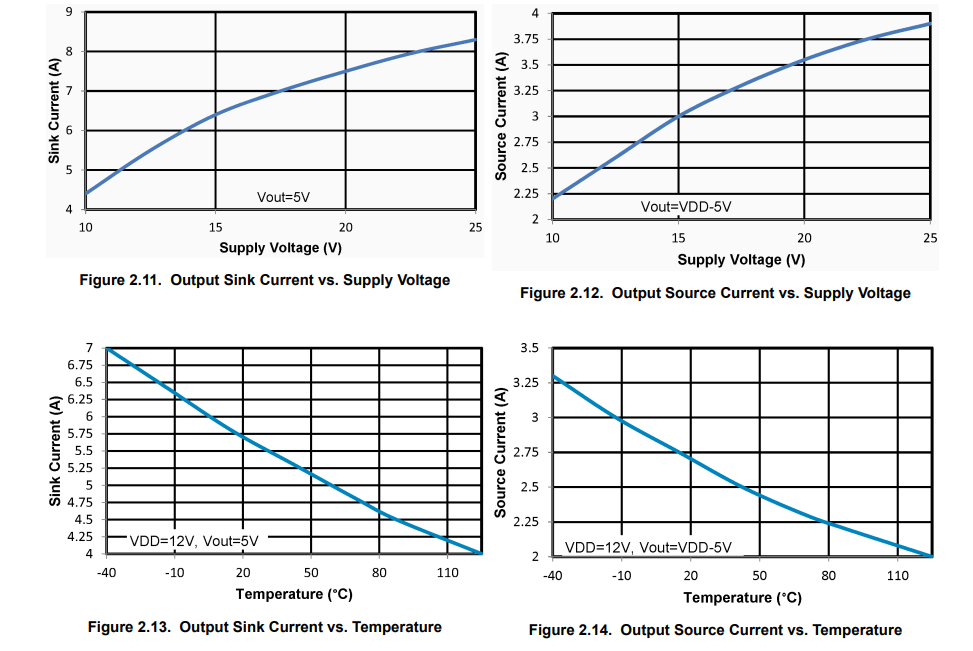

In [148]:
%%render 
Sink = min(5.1,4.6) # A Neg, VDD = 12V Temp = 80°C
Source =  min( 2.5, 2.25) # A Pos, VDD = 12V Temp = 80°C

<IPython.core.display.Latex object>

In [149]:
%%render 
Margin = 0.3
Sink_m = Sink *(1-Margin) # A
Source_m = Source *(1-Margin) # A

<IPython.core.display.Latex object>

In [150]:
arr=[]
for R_ext in [1,3,5,10,15,20]:
    R_GtotP=R_gi+Rpd+R_ext
    R_GtotN=R_gi+Rnd+R_ext
    t_target_nsP = R_GtotP*Qg_ns/Vdrive
    t_target_nsN = R_GtotN*Qg_ns/Vdrive
    Ig_peakP = Vdrive/R_GtotP # A
    Ig_peakN = Vdrive/R_GtotN # A
    dic = {"R_ext":R_ext,

           "R_GtotP":R_GtotP,
           "R_GtotN":R_GtotN,
            "t_target_nsP":t_target_nsP, 
            "t_target_nsN":t_target_nsN, 
            "Ig_peakP":Ig_peakP, 
            "Ig_peakN":Ig_peakN,   
           "Ig_peakP < Source_margin": (Ig_peakP < Source_m ), 
           "Ig_peakN < Sink_margin":(Ig_peakN < Sink_m)  
          }
    arr.append(dic)
pd.DataFrame(arr)

,R_ext,R_GtotP,R_GtotN,t_target_nsP,t_target_nsN,Ig_peakP,Ig_peakN,Ig_peakP < Source_margin,Ig_peakN < Sink_margin
0,1,4.5,2.8,25.500000,15.866667,2.666667,4.285714,False,False
1,3,6.5,4.8,36.833333,27.200000,1.846154,2.500000,False,True
2,5,8.5,6.8,48.166667,38.533333,1.411765,1.764706,True,True
3,10,13.5,11.8,76.500000,66.866667,0.888889,1.016949,True,True
4,15,18.5,16.8,104.833333,95.200000,0.648649,0.714286,True,True
5,20,23.5,21.8,133.166667,123.533333,0.510638,0.550459,True,True


In [151]:
print(pd.DataFrame(arr).to_markdown())

|    |   R_ext |   R_GtotP |   R_GtotN |   t_target_nsP |   t_target_nsN |   Ig_peakP |   Ig_peakN | Ig_peakP < Source_margin   | Ig_peakN < Sink_margin   |
|---:|--------:|----------:|----------:|---------------:|---------------:|-----------:|-----------:|:---------------------------|:-------------------------|
|  0 |       1 |       4.5 |       2.8 |        25.5    |        15.8667 |   2.66667  |   4.28571  | False                      | False                    |
|  1 |       3 |       6.5 |       4.8 |        36.8333 |        27.2    |   1.84615  |   2.5      | False                      | True                     |
|  2 |       5 |       8.5 |       6.8 |        48.1667 |        38.5333 |   1.41176  |   1.76471  | True                       | True                     |
|  3 |      10 |      13.5 |      11.8 |        76.5    |        66.8667 |   0.888889 |   1.01695  | True                       | True                     |
|  4 |      15 |      18.5 |      16.8 |       104.833  | 

In [152]:
# you must choise a  SMD jumper shunt 1.27 mm pitch aliexpress to selection a resistance 

In [153]:
%pip install tabulate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\a037702\NotSynchronized\VirtualEnvs\venv1\Scripts\python.exe -m pip install --upgrade pip


In [154]:
# ===========> make routing to use both with VIA VIB or with PWM == >see datasheet of te driver 
# PWM very simple , safe 
# VIA/VIB more controlabiliy 

# SECONDARY

Smart diode IC 
https://www.infineon.com/assets/row/public/documents/24/49/ir1169.pdf?fileId=5546d462533600a4015355c485c4165e

https://www.onsemi.com/download/data-sheet/pdf/fan6204a-d.pdf


MCP4304


https://www.onsemi.com/download/data-sheet/pdf/ncp43080-d.pdf


https://www.mouser.fr/ds/2/115/ZXGD3113W6-1221104.pdf

https://www.onsemi.com/pdf/datasheet/ncp4303-d.pdf

https://www.ti.com/lit/ds/symlink/ucc24636.pdf

https://www.onsemi.com/download/data-sheet/pdf/ncp4304-d.pdf


https://www.ti.com/lit/ds/symlink/ucc24612.pdf?ts=1753447607251&ref_url=https%253A%252F%252Fwww.google.com%252F


**48V TO 15V** 
https://www.ti.com/lit/ds/symlink/lm5160a.pdf
SEE LM2575HV
https://www.ti.com/lit/ds/symlink/lm2575-n.pdf


mINIMU BOM 

https://www.monolithicpower.com/en/mp4581.html

https://www.monolithicpower.com/en/documentview/productdocument/index/version/2/document_type/Datasheet/lang/en/sku/MP4581GN/document_id/6903/


| Feature                         | **MP4541**                                                                                                    | **MP4581**                                                                                                                         |
| ------------------------------- | ------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| **Max input voltage (VIN)**     | 8 V to **80 V** ([Monolithic Power Systems][1])                                                               | 8 V to **100 V** ([Monolithic Power Systems][2])                                                                                   |
| **Output current (IOUT max)**   | Up to **0.8 A** ([Monolithic Power Systems][1])                                                               | Up to **0.8 A** ([Monolithic Power Systems][2])                                                                                    |
| **Control method**              | Constant-On-Time (COT)                                                                                        | Constant-On-Time (COT)                                                                                                             |
| **Switching frequency**         | Configurable 100 kHz–1 MHz via resistor ([Monolithic Power Systems][1])                                       | Configurable 100 kHz–1 MHz via resistor ([Monolithic Power Systems][2])                                                            |
| **Light-load efficiency (PSM)** | High-efficiency pulse-skip mode ([Monolithic Power Systems][1])                                               | Supports high-efficiency PSM ([Monolithic Power Systems][2])                                                                       |
| **Protection features**         | Over-current & short-circuit (hiccup), soft-start, built-in loop compensation ([Monolithic Power Systems][1]) | Similar protections (OCP, SCP, soft-start) though datasheet summary emphasizes overall feature set ([Monolithic Power Systems][2]) |
| **Package type**                | SOIC-8EP                                                                                                      | SOIC-8EP                                                                                                                           |

[1]: https://www.monolithicpower.com/en/documentview/productdocument/index/version/2/document_type/Datasheet/lang/en/sku/MP4541GN/?utm_source=chatgpt.com "MP4541 - Monolithic Power Systems"
[2]: https://www.monolithicpower.com/en/mp4581.html?utm_source=chatgpt.com "MP4581 | 100V, 0.8A Synchronous Buck Converter | MPS"


| Part (datasheet / product page)                                                                           |                                                                         Mouser unit price (1 pc) |                                                                                                                                                                                          Peak **sink / source** (datasheet) |                                                                                                                                                   VCC / VDD max (typ recommended) | BOM (minimal → what you still need)                                                                                                                                     | Quick notable features                                                                                                                                                             |
| --------------------------------------------------------------------------------------------------------- | -----------------------------------------------------------------------------------------------: | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------: | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------: | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **UCC24612** (TI) — high-freq SR controller. ([Texas Instruments][1], [Mouser Electronics][2])            |                                                   **\$0.75** (Mouser). ([Mouser Electronics][2]) |                                                                                                                                                           **4 A sink / 1 A source** (peak pulsed). ([Texas Instruments][1]) |                                                                                VDD recommended **≤ 28 V** (logic VDD); VD (drain sense) up to **230 V**. ([Texas Instruments][1]) | **Small** — SR IC + VDD bias (12 V), VG resistor, TVS/snubber on drain. (You still need a small bias regulator if you don’t have aux winding.) ([Texas Instruments][1]) | VDS sensing to 230 V; up to 1 MHz; proportional gate drive & adaptive off-time (good for LLC). ([Texas Instruments][1])                                                            |
| **UCC24636** (TI) — ultra-low standby SR. ([Texas Instruments][3])                                        |                            **≈€1.14 / \$1.13** (Mouser EU/US listing). ([Mouser Electronics][4]) | **moderate** (datasheet shows gate drive with peak pulses in application; continuous gate source/sink small ±50 mA spec for some pins — see datasheet). (Use for DCM/TM flyback SR.) ([Texas Instruments][3], [DigiKey][5]) |                                                            VDD range optimized for **5–24 V** outputs (check datasheet). VD sensing used for SR control. ([Texas Instruments][3]) | **Small** — SOT-23 SR IC + bias and a handful of passives. Designed for low standby power (good if you need very low idle current). ([Texas Instruments][3])            | Ultra-low standby (≈110 µA in standby), optimized for DCM/transition-mode flybacks; simple footprint. Good for low-power adapters. ([Texas Instruments][3])                        |
| **IR1169S** (Infineon / ex-IR SmartRectifier). ([DigiKey][6], [Mouser Electronics][7])                    |                       **≈€1.99** (Mouser EU listing for IR1169STRPBF). ([Mouser Electronics][7]) |                                                                                                                                       **\~4 A peak** (turn-off drive capability noted in datasheet summary). ([DigiKey][6]) |                          VCC / VDD: typically **11–20 V** operating (device uses 200 V process for VD sensing). VD sensing up to **\~200 V** (Infineon 200V tech). ([DigiKey][6]) | **Small → medium** — SR controller + typical passives; robust high-voltage VD sensing (good if you need > 70–100 V drain sensing). ([DigiKey][6])                       | 200 V tech (good for high-VD), CCM support, very fast turn-off, gate clamp \~10.7 V. (NRND/legacy — check availability for new designs). ([DigiKey][6], [Mouser Electronics][8])   |
| **FAN6204A** (onsemi / Fairchild) — mWSaver SR controller. ([Mouser Electronics][9])                      | **\~\$0.75** (Mouser listing / onsemi price reference). ([Mouser Electronics][10], [onsemi][11]) |         Datasheet: **totem-pole gate driver** — datasheet shows typical gate clamp 12 V; explicit peak current not highlighted as a single number (sufficient for SR MOSFETs in flyback/forward). ([Mouser Electronics][9]) | VDD operating down to **\~4.8 V** (document shows low VDD support up to \~24 V operation range in examples). Check datasheet for exact recommended VDD. ([Mouser Electronics][9]) | **Small** — SR IC + winding sense / bias resistors + gate resistor. Good for QR/DCM/CCM flyback. ([Mouser Electronics][9])                                              | Frequency tracking, ultra-low green-mode current, PWM frequency tracking and linear-predict timing control for QR/ flyback. Good for low-power adapters. ([Mouser Electronics][9]) |
| **NCP43080** (onsemi) — high-drive SR controller. ([onsemi][12], [Mouser Electronics][13])                |                                       **≈€0.69** (Mouser EU listing). ([Mouser Electronics][13]) |                                                                                                 **8 A sink / 4 A source** (peak pulsed, datasheet). Very strong turn-off sink ability for tight VDS control. ([onsemi][12]) |                                                         VCC / VDD rated up to **\~35 V** (options exist; verify variant). VD/drive architecture for high-speed SR. ([onsemi][12]) | **Small → medium** — SR controller + passives; adjustable blanking / on/off times (good for robust, noisy layouts). ([onsemi][12])                                      | GaN-capable options, adjustable on/off blanking, up to 1 MHz, strong sink capability (good for high-current SR on LLC/flyback). ([DigiKey][14])                                    |
| **NCP4303** (onsemi) — family SR controller. ([onsemi][15], [Mouser Electronics][16])                     | **≈\$0.96** (Mouser listing / Digi-Key pricing shown). ([Mouser Electronics][16], [DigiKey][17]) |                                                                                                                                                             **5 A sink / 2.5 A source** (peak pulsed). ([AllDataSheet][18]) |                                                                                                                  VCC up to **\~30 V** (datasheet shows VCC range). ([onsemi][15]) | **Small** — typical SR controller, needs VDD bias. Good balance of drive and features for mid-power SMPS. ([onsemi][15])                                                | Adjustable blanking, true secondary ZCD, selectable gate clamp (12/6 V variants). Widely used in flyback/LLC designs. ([AllDataSheet][18])                                         |
| **NCP4304** (onsemi) — SR family variant. ([onsemi][19])                                                  |   **≈€0.33–0.70** (Mouser listings vary by package/qty — see Mouser). ([Mouser Electronics][20]) |                                                                                                                             **typical** family drive \~5 A / 2.5 A (check datasheet for A/B variants). ([AllDataSheet][21]) |                                                                                               VCC up to **\~30 V** (check variant A/B datasheet for clamps). ([AllDataSheet][21]) | **Small** — standard onsemi SR family features (ZCD, blanking, adjustable times). Good OEM choice. ([AllDataSheet][21])                                                 |                                                                                                                                                                                    |
| **ZXGD3113W6** (Diodes Inc) — simple ideal-diode MOSFET controller (SOT-23-6). ([Mouser Electronics][22]) |                                          **\$0.55** (Mouser listing). ([Mouser Electronics][23]) |                                                                                                        **\~3 A sink / 1.5 A source** (peak pulsed) per datasheet / product pages. ([DigiKey][24], [Mouser Electronics][25]) |                                                                                           VCC **3.5 – 40 V** (wide); good for many secondary voltages. ([Mouser Electronics][22]) | **Very small BOM** — aimed at replacing diode w/ MOSFET + single controller. Proportional gate control; simple and compact. ([Mouser Electronics][22])                  |                                                                                                                                                                                    |

[1]: https://www.ti.com/lit/ds/symlink/ucc24612.pdf "UCC24612 High Frequency Synchronous Rectifier	 Controller datasheet (Rev. A)"
[2]: https://www.mouser.com/ProductDetail/Texas-Instruments/UCC24612-1DBVR?qs=YCa%2FAAYMW03eENJ79c7Log%3D%3D&srsltid=AfmBOopuPKxsbhVJPZl_HsiGaHMreJH0G8XImW1h8b0YFxEsFXdY6sJC&utm_source=chatgpt.com "UCC24612-1DBVR Texas Instruments - Mouser Electronics"
[3]: https://www.ti.com/lit/ds/symlink/ucc24636.pdf?utm_source=chatgpt.com "[PDF] UCC24636 Synchronous Rectifier (SR) Controller With Ultra-Low ..."
[4]: https://www.mouser.com/ProductDetail/Texas-Instruments/UCC24636DBVR?qs=l4JqiU1WKg3U3Yr0d47ajw%3D%3D&srsltid=AfmBOopjAkokyRxYEprIM8DU1LT9VRRbvSuZE6bPvYSd8a7F1YPbbx94&utm_source=chatgpt.com "UCC24636DBVR Texas Instruments - Mouser Electronics"
[5]: https://www.digikey.com/en/htmldatasheets/production/1894087/0/0/1/ucc24636dbvr.html?utm_source=chatgpt.com "UCC24636 by Texas Instruments Datasheet | DigiKey"
[6]: https://www.digikey.com/en/htmldatasheets/production/1264298/0/0/1/ir1169s.html?utm_source=chatgpt.com "IR1169S by Infineon Technologies Datasheet | DigiKey"
[7]: https://www.mouser.com/ProductDetail/Infineon-Technologies/IR1169STRPBF?qs=bpdTKHvGARmHFrCzwGUCbQ%3D%3D&srsltid=AfmBOopimsqorufESS4bIcFsLPZfgCgRMCaqjNNVB1-UW5yhgfiYpt5q&utm_source=chatgpt.com "IR1169STRPBF Infineon Technologies - Mouser Electronics"
[8]: https://www.mouser.com/ProductDetail/Infineon-IR/IR1169SPBF?qs=bpdTKHvGARnS8X23ouD%252BFQ%3D%3D&srsltid=AfmBOopf_4cOtgxaCrxwCNgM2UPiQiomg8H6sEZjUU156bbuU-SMa0qq&utm_source=chatgpt.com "IR1169SPBF Infineon Technologies - Mouser Electronics"
[9]: https://www.mouser.com/ds/2/149/FAN6204-94546.pdf?srsltid=AfmBOorlpM8DYBppxR5cwuL_9K0fnEEa3Xk3CMn5SdI_cwuo2oA0jRgQ "FAN6204 - mWSaver™ Synchronous Rectification Controller for Flyback and Forward Freewheeling Rectification"
[10]: https://www.mouser.com/ProductDetail/onsemi-Fairchild/FAN6204AMX?qs=u4fy%2FsgLU9NIqFGL9beC%252BA%3D%3D&srsltid=AfmBOopikObIonFBOOYqOcvfBBhxyY5xv_rnTrZDJFkHA4h3u-y4MPZq&utm_source=chatgpt.com "FAN6204AMX onsemi / Fairchild - Mouser Electronics"
[11]: https://www.onsemi.com/products/power-management/ac-dc-power-conversion/secondary-side-controllers/fan6204a?utm_source=chatgpt.com "FAN6204A - onsemi"
[12]: https://www.onsemi.com/download/data-sheet/pdf/ncp43080-d.pdf?utm_source=chatgpt.com "[PDF] NCP43080 - Synchronous Rectifier Controller - onsemi"
[13]: https://www.mouser.com/ProductDetail/onsemi/NCP43080ADR2G?qs=4vGevBu%252B8qm6lzgD6nO%252B4g%3D%3D&srsltid=AfmBOorsJFHLq_f6MNT8OV777K3N06rTCfJgK7J4gCpp9CLl0f0AlDIU&utm_source=chatgpt.com "NCP43080ADR2G onsemi - Mouser Electronics"
[14]: https://www.digikey.com/en/product-highlight/o/on-semi/ncp43080-synchronous-rectifier-controller?utm_source=chatgpt.com "NCP43080 Synchronous Rectifier Controller - DigiKey"
[15]: https://www.onsemi.com/pdf/datasheet/ncp4303-d.pdf?utm_source=chatgpt.com "[PDF] NCP4303A, NCP4303B Secondary Side Synchronous Rectification ..."
[16]: https://www.mouser.com/ProductDetail/onsemi/NCP4303ADR2G?qs=yYCK2ysgWqnXEowHmfzKJA%3D%3D&srsltid=AfmBOoraQUpDul59LvnahwB1M8Fd6uagCq3zoTNS-7pPJ8d62GjQjySQ&utm_source=chatgpt.com "NCP4303ADR2G onsemi - Mouser Electronics"
[17]: https://www.digikey.com/en/products/detail/onsemi/NCP4303ADR2G/2401338?utm_source=chatgpt.com "NCP4303ADR2G onsemi | Integrated Circuits (ICs) - DigiKey"
[18]: https://www.alldatasheet.com/datasheet-pdf/pdf/2073133/ONSEMI/NCP4303.html?utm_source=chatgpt.com "NCP4303 Datasheet(PDF) - ON Semiconductor"
[19]: https://www.onsemi.com/download/data-sheet/pdf/ncp4304-d.pdf?utm_source=chatgpt.com "[PDF] NCP4304 - onsemi"
[20]: https://www.mouser.com/ProductDetail/onsemi/NCP4304ADR2G?qs=8%252BXDBfnGdBw2P9YzX6TmEg%3D%3D&utm_source=chatgpt.com "NCP4304ADR2G onsemi | Mouser"
[21]: https://www.alldatasheet.com/datasheet-pdf/pdf/486501/ONSEMI/NCP4304.html?utm_source=chatgpt.com "NCP4304 Datasheet(PDF) - ON Semiconductor"
[22]: https://www.mouser.com/datasheet/2/115/ZXGD3113W6-1221104.pdf?srsltid=AfmBOoqatp-M1RfKjpDdImEwTJnFjUu3iBUbO62bLqJsV9Rxsv4oIHI-&utm_source=chatgpt.com "[PDF] ZXGD3113W6 8 - Mouser Electronics"
[23]: https://www.mouser.com/ProductDetail/Diodes-Incorporated/ZXGD3113W6-7?qs=1mbolxNpo8dIjatJMx%252BPDA%3D%3D&srsltid=AfmBOopP1_aBDPaY6tmH2m4QMJArrCXCw6W3Nz6gHMVXwb0aGTWdwY1m&utm_source=chatgpt.com "ZXGD3113W6-7 Diodes Incorporated - Mouser Electronics"
[24]: https://www.digikey.com/en/products/detail/diodes-incorporated/ZXGD3113W6-7/7802495?utm_source=chatgpt.com "ZXGD3113W6-7 Diodes Incorporated | Integrated Circuits (ICs)"
[25]: https://www.mouser.com/ProductDetail/Diodes-Incorporated/ZXGD3113W6-7?qs=1mbolxNpo8dIjatJMx%252BPDA%3D%3D&srsltid=AfmBOopZ1tqJ3MApiAP4y12Ex4OMfxpZpZ4GZRpQFOyWSJ9u7HvXu1wV&utm_source=chatgpt.com "ZXGD3113W6-7 Diodes Incorporated - Mouser Electronics"


In [155]:
# IRF150P221AKMA1
# https://eu.mouser.com/ProductDetail/Infineon-Technologies/IRF150P221AKMA1?qs=iLbezkQI%252BsgFvQ9qK7vaNg%3D%3D
# https://eu.mouser.com/datasheet/2/196/Infineon_IRF150P221_DataSheet_v02_02_EN-3362781.pdf

In [156]:
%%render 
Qg_nc= 80 # Q= V*C
Vdrive = 10
C_nF = Qg_nc/Vdrive # nF
Ipeak = Vdrive / C_nF # A 

<IPython.core.display.Latex object>

https://www.mouser.fr/c/power/power-management-ics/switching-controllers/?series=NCP43080

https://www.onsemi.com/download/data-sheet/pdf/ncp43080-d.pdf

https://www.onsemi.com/products/power-management/ac-dc-power-conversion/secondary-side-controllers/ncp43080

In [157]:
# we can try this 
# https://www.onsemi.com/download/data-sheet/pdf/ncp43080-d.pdf
# without LLD ==> shorted to gnd 

# or
# https://www.ti.com/lit/ds/symlink/ucc24612.pdf?ts=1754878142121

############" ncp43080 is best ==> NCP43080DDR2G

# https://www.mouser.fr/ProductDetail/onsemi/NCP43080DDR2G?qs=9HM%2FdYkAMWwy9zz%252Borp9mg%3D%3D


# Design justification — driving two IRF150P221AKMA1 MOSFETs (secondary) in a 400V→48V, 1200 W LLC (half-bridge primary / two-FET secondary midpoint)

> Assumptions (please correct if any are wrong)
- Output power 1200 W, `Vo_nom = 48 V` → nominal output current `Iout_nom = 1200 / 48 = 25 A`. Worst-case at `Vo_min = 42 V` → `Iout_max ≈ 28.57 A`.  
- The two MOSFETs on the secondary form synchronous rectifiers (SR) around the midpoint; each SR FET will be driven by its own SR controller/driver.  
- Converter switching frequency range given by you: `fsw_min = 60.17 kHz`, `fsw_max = 156.22 kHz`. (I use these for gate-drive loss estimates.)  
- MOSFET: IRF150P221AKMA1 — use manufacturer datasheet values: VDS = 150 V, QG(0→10 V) ≈ 80 nC, RDS(on)typ ≈ 3.6 mΩ, RDS(on)max ≈ 4.5 mΩ, Qrr ≈ 74 nC.  
- Two candidate SR controllers: **NCP43080DDR2G (onsemi)** and **UCC24612 (TI)**. I compare them as SR drivers for the IRF MOSFETs and give a final recommendation and VCC choice rationale. Datasheets used for device specs.

---

## Quick device highlights (most relevant specs)
- **NCP43080 (onsemi)**: SR controller aimed at high-efficiency SR. Peak driver currents **8 A sink / 4 A source**, operating VCC range up to **≈35 V**, selectable gate-clamp options (5 V and 10 V clamp variants), light-load disable/LLD, adjustable min-on/min-off blanking, max operation frequency up to **1 MHz**. Designed with features (Kelvin connections, 0 mV turn-off threshold, adaptive clamp) to maximize SR efficiency.  
- **UCC24612 (TI)**: high-frequency SR controller optimized for flyback/LLC/forward etc. **4 A sink / 1 A source** gate driver, **VDS sensing up to 230 V**, **9.5 V gate-drive clamp**, VDD range **5–28 V**, adaptive minimum off-time, max operating frequency up to **1 MHz** (variant dependent). Includes proportional drive and CCM features for noise immunity and efficiency at a range of conditions.  
- **IRF150P221 (Infineon)**: large TO-247 N-channel MOSFET. **Qg(0→10V) ≈ 80 nC**, **RDS(on)typ 3.6 mΩ / max 4.5 mΩ**, **VGS(max) = ±20 V**, Qrr ≈ 74 nC.

---

## Gate-drive loss and timing (evidence + calculations)

### Gate charge (given)
- Use `Qg = 80 nC` (0→10 V) from IRF datasheet.

### Gate-drive energy per switching (per FET)
- Energy per gate transition ≈ `E_g = Qg * Vdrive`. Therefore gate-drive *power* ≈ `P_g = Qg * Vdrive * fSW`.

Using your fsw limits and typical driver clamp / gate-drive voltages:
- If driver clamps to **10 V** (NCP variant):  
  - `P_g (min f) = 80e-9 * 10 * 60,170 ≈ 0.0481 W` (per FET)  
  - `P_g (max f) = 80e-9 * 10 * 156,220 ≈ 0.1250 W` (per FET)
- If the driver clamps to **9.5 V** (UCC24612):  
  - `P_g (min) ≈ 0.0457 W` per FET  
  - `P_g (max) ≈ 0.1187 W` per FET

If you instead ran the driver at full VCC (no clamp) — e.g. 12 V, 15 V or 20 V — gate-drive power scales linearly (numbers shown for reference): at 12 V → ~0.058 W..0.150 W per FET; at 15 V → ~0.072 W..0.187 W; at 20 V → ~0.096 W..0.250 W. (Double these values for both MOSFETs.)  
> Conclusion: **gate-drive power is small** (tens to a few-hundreds of milliwatts per FET) relative to 1.2 kW output, but it is *non-negligible* for thermal budget and driver thermal dissipation.

### Turn-on/turn-off speed (driver peak currents)
- **NCP43080**: 4 A source / 8 A sink peak capability → estimated rise/fall time approx `tr ≈ Qg / Idrive`. With 4 A source: `tr ≈ 80e-9 / 4 = 20 ns` (idealized peak region). Faster turn-on reduces the time the device spends in linear region (reduces transition loss) and reduces body-diode conduction overlap, but increases di/dt/EMI.  
- **UCC24612**: 1 A source / 4 A sink → with 1 A source: `tr ≈ 80e-9 / 1 = 80 ns` (idealized). UCC’s weaker source current means slower charging of the gate; however UCC implements **proportional gate drive** and adaptive features to optimize conduction timing and reduce losses in CCM/LLC.

**Implication for SR in LLC:** SR switching happens near zero voltage (ZVS/ZV transitions). That lowers switching energy penalty even for slower gate-transitions, but the *timing* and *turn-off speed* are critical to avoid forward-diode conduction and to capture the right conduction window (turn-off too late → extra conduction; turn-on too early → body diode reverse conduction). Thus, both turn-off and turn-on timing and blanking are crucial; both controllers provide adjustable blanking/min-on/min-off features (NCP: adjustable MIN_TON/MIN_TOFF; UCC: adaptive minimum off-time + fixed minimum on-time variant selections).

---

## Conduction (I²R) losses estimate — MOSFET conduction power
Worst-case currents (Vo_min = 42 V): `I ≈ 28.57 A`. Using RDS(on)max = 4.5 mΩ:
- `Pcond_max ≈ I² * RDS(max) = 28.57² * 0.0045 ≈ 3.67 W` per MOSFET (if continuously conducting at that current).  
At nominal (25 A) RDS(max) → `P ≈ 2.81 W` per MOSFET. Using typical RDS(on) = 3.6 mΩ gives `~2.25 W` (25 A) and `~2.94 W` (28.6 A).  
Conclusion: **conduction losses (~2.5–4 W per FET worst case)** dominate over the gate-drive losses. Thermal design (heat-sink, PCB copper, junction-to-case) must handle these dissipation levels.

---

## How each controller matches the IRF150P221 and your system

### NCP43080 — strengths & what it gives you
- **Higher peak source current (4 A)** compared to UCC24612 → faster gate charging of the IRF150 (80 nC). This reduces transition crossover time even at your fsw range and reduces any residual conduction during switching windows. Good when you want tight control of timing and fast, deterministic transitions.  
- **Higher sink capability (8 A)** gives very fast turn-off, which is valuable for SR to stop conduction right at zero crossing and to minimize reverse conduction.  
- **Selectable clamp options (5 V / 10 V) and VCC up to ~35 V** gives flexibility: choose 10 V clamp (or 10 V behavior) to place the IRF right at its optimal gate for lowest RDS(on). NCP also supports GaN driving variants if needed.  
- **Rich timing adjustment (MIN_TON/MIN_TOFF)** and excellent light-load behavior (LLD) help optimize SR conduction window across the load range (useful for your Vo_min→Vo_max range).

**Tradeoffs / caveats**: larger package and more aggressive drive can increase EMI and di/dt stress on the layout/transformer/secondary loop. You should ensure strong gate resistances and snubbing/clamping if needed. Also NCP’s stronger source current charges Qg faster → higher instantaneous driver dissipation (drive peak stress) though average driver power remains small.

### UCC24612 — strengths & what it gives you
- **SR-focused with VDS sensing, proportional gate drive, adaptive off-time, and 9.5 V gate clamp** specifically designed for LLC/flyback SR use. Its proportional drive and CCM features can reduce conduction losses while improving noise immunity.  
- **Lower gate-clamp (9.5 V)** reduces gate-drive energy slightly vs 10–12 V, and its automatic light-load / sleep modes can improve standby efficiency for wide Vout ranges.  
- **Smaller package and simpler interface** — very common in energy-efficient adapter/topology designs.

**Tradeoffs / caveats**: **weaker source current (≈1 A)** → much slower gate charging for an IRF with 80 nC gate charge. In SR operation (ZVS), slow turn-on is often tolerable, but slow turn-off or poorly timed turn-on can increase conduction overlap with diode conduction and cause extra losses. UCC’s proportional drive mitigates some issues, but for a *high-power* SR carrying ~25–29 A continuously, the weaker source current could increase dynamic conduction losses in some transient or timing situations.

---

## VCC choice: 12 V vs 15 V vs 20 V — recommended practice
- **MOSFET optimum**: IRF150P221 shows best RDS(on) at ~10 V gate; VGS(max) = ±20 V. Driving to 10–12 V gate is the usual recommendation for low RDS(on) without overstressing the gate.  
- **Driver clamp behavior**:
  - **NCP43080**: has clamp options (5 V/10 V) and supports VCC up to ~35 V — pick the 10 V clamp variant (or set clamp to ~10 V) and feed VCC = **12 V** for comfortable margin (12 V gives headroom for internal regulator/clamp).  
  - **UCC24612**: has a **9.5 V** gate drive clamp. Use **VDD = 12 V** (within its 5–28 V range) — it will clamp gate ≈9.5 V which is slightly below the IRF’s 10 V ideal but close enough; UCC’s proportional drive and features compensate for timing. Using 15 V or 20 V is unnecessary because the controller clamps gate; it would only increase driver dissipation if you do not rely on the clamp.
- **Recommendation**: use **12 V** VCC for both drivers (or a regulated 12 V secondary bias). For **NCP43080**, select the **10 V clamp** variant or configure its clamp for ~10 V. For **UCC24612**, its built-in 9.5 V clamp is acceptable but expect slightly higher RDS(on) vs a full 10 V drive (difference small). Using higher VCC (15–20 V) gives little real benefit unless you purposefully want to set higher VGS (but that increases gate-drive loss and risk).

---

## Practical recommendations & system items to implement
1. **Driver selection** — short version:
   - If your priority is *maximum efficiency at high load and tight timing control* (you want fastest transitions and tight turn-off to reduce reverse conduction), **NCP43080 (10 V clamp variant)** is **preferred** (higher source/sink currents, adjustable timing, higher VCC headroom).  
   - If your priority is *simplicity, proven SR behavior with proportional drive, lower standby power and small package* (and you accept slightly slower gate charge), **UCC24612** is **a valid and robust choice** (its SR features are optimized for LLC/flyback SR).

2. **VCC**: use **12 V** bias for the SR controllers. For NCP, use the 10 V clamp option; for UCC it will clamp at ~9.5 V. This targets optimal RDS(on) without excessive gate losses.

3. **Gate resistor and layout**:
   - Add a small series gate resistor to control di/dt and ringing: typical starting values 5–22 Ω (tune in lab). NCP’s strong source current may need larger resistor than UCC. Use a small damped RC or ferrite bead if oscillation occurs.  
   - Keep gate loop inductance low: short traces, Kelvin gate/source routing, local decoupling right at driver/Gate pins. Both controllers reference Kelvin sense and note layout is critical.

4. **Blanking/timing tuning**:
   - Use the NCP43080 MIN_TON / MIN_TOFF resistors (or UCC24612 adaptive timers + variant selection) to tune turn-on/turn-off timing so the SR conducts the diode interval only and turns off promptly at the zero crossing. Test across full load range (Vo_min to Vo_max) and across temperature.

5. **Thermal management**:
   - Expect **~2.5–4 W** conduction dissipation per MOSFET worst case (I²R with RDS up to 4.5 mΩ at ~28.6 A). Provide appropriate TO-247 heatsinking or PCB copper thermal paths and check junction temperatures (use RthJC, RthJA from the Infineon datasheet).

6. **Driver power dissipation**:
   - Gate-drive power per MOSFET is small (≈ 0.05–0.13 W per FET at 9.5–10 V and your fsw range), but driver internal dissipation from switching peaks must be verified (check driver thermal limits and observe peak currents). For two FETs double the gate drive average power.

7. **SR protection**:
   - Ensure VDS sense ranges and protection are compatible (UCC supports VDS sensing to 230 V which is more than safe for secondary side up to your voltages; NCP has robust CS/0 mV threshold features). Include transient protection as needed (RC snubbers, TVS on supply rails if spikes expected).

---

## Final recommended configuration (practical)
- **Driver:** **NCP43080DDR2G** per MOSFET if you want top efficiency and fastest, tight SR control (recommended for a 1.2 kW, high-current SR implementation). Use its **10 V clamp** variant. If board area, standby efficiency and simpler tuning are more important and you accept slightly slower gate charge, **UCC24612** is acceptable.  
- **VCC for drivers:** **12 V regulated** supply (keeps gate drive near 10 V clamp and gives headroom).  
- **Gate resistor:** start 5–15 Ω (tune in lab); larger for NCP only if EMI is too high.  
- **Thermal:** design coolers/PCB copper for **~3–4 W per FET** worst case; check junction temps at max ambient and consider forced convection / heatsink.

---

## Tests to perform in prototype (order of importance)
1. Verify SR timing vs primary timing across load sweep (turn-on/turn-off positions, adjust MIN_TON/MIN_TOFF or UCC timing features).  
2. Measure VGS waveform, di/dt and dv/dt during SR transitions (verify no false turn-ons, no ringing).  
3. Junction thermal test at full load (Vo_min case), steady-state and pulsed overload.  
4. EMI check and adjust gate resistor / snubbers.  
5. Light-load and no-load behavior (NCP LLD or UCC sleep modes) for efficiency verification.


Energy per gate transition ≈ `E_g = Qg * Vdrive`. Therefore gate-drive *power* ≈ `P_g = Qg * Vdrive * fSW`

In [158]:
%%render 
P_g = Qg_nc*Vdrive*fsw_max*1e-9 # W

<IPython.core.display.Latex object>

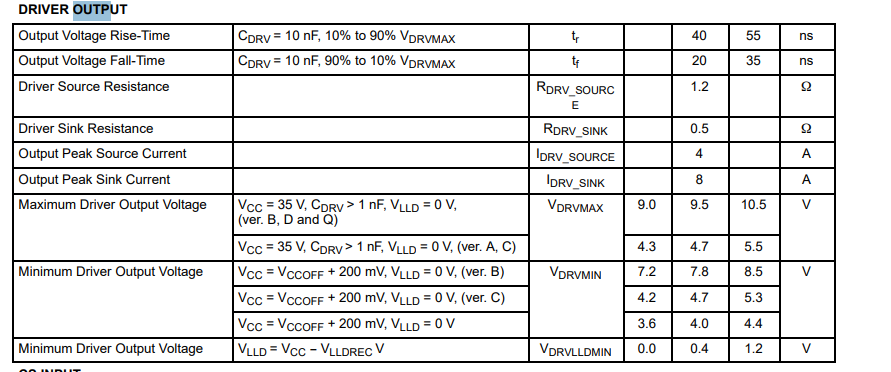

In [159]:
%%render 
Rdp=1.2
Rdn= 0.5
Vdrive_max = 10.5
Vrdive_min= 9
Iccp= Vdrive_max/Rdp # 8.75 not 4A
Iccn= Vdrive_max/Rdn # 21A not 8A

<IPython.core.display.Latex object>

In [161]:
from math import log

In [162]:
%%render
fact_10to90= log(0.9/0.1) # clause to 2.2 in RC circuit, tr is time form 10\% to 90\%
CDRV_nF = 10 # nF
tr_ns= 40 # tr is measured 10\%→90\%
tf_ns= 20 
Vdrive = 9.5
Rp = tr_ns/(2.2*CDRV_nF) 
Rn = tf_ns/(2.2*CDRV_nF) 
Ipeak_source= Vdrive/Rp # chause to 4A of datasheet 
Ipeak_sink= Vdrive/Rn # chause to 8A of datasheet 

<IPython.core.display.Latex object>

In [163]:
%%render 
Ipeakp= Vdrive/Rp

<IPython.core.display.Latex object>

In [164]:
%%render 
#methode 2
Ipeak_source =4
Ipeak_sink = 8
Rp = Vdrive/Ipeak_source 
Rn = Vdrive/Ipeak_sink

Rg

<IPython.core.display.Latex object>

In [165]:
%%render 
Vrdive_data= 10
Crdive_nF = Qg_nc/Vrdive_data

<IPython.core.display.Latex object>

In [187]:
%%render 
Rg = 1.1
Rext = 3
Rtot_P= Rg + Rext + Rp
Rtot_N= Rg + Rext + Rn
Ipeak_P= Vdrive/Rtot_P
Ipeak_N= Vdrive/Rtot_N

<IPython.core.display.Latex object>

In [188]:
%%render 
tr_ns = Rtot_P*(2.2*Crdive_nF) # ns
tf_ns = Rtot_N*(2.2*Crdive_nF) # ns

<IPython.core.display.Latex object>

In [189]:
arr=[]
for Rext in [0,0.5,1,3,5]:
    for Vdrive in [9,9.5,10.5]:
        Rg = 1.1
        #Rext = 3
        Rtot_P= Rg + Rext + Rp
        Rtot_N= Rg + Rext + Rn
        Ipeak_P= Vdrive/Rtot_P
        Ipeak_N= Vdrive/Rtot_N
        
        tr_ns = Rtot_P*(2.2*Crdive_nF) # ns
        tf_ns = Rtot_N*(2.2*Crdive_nF) # ns
        #print("Rext",Rext, "Vdrive", Vdrive, "Ipeak_P", Ipeak_P, "Ipeak_N", Ipeak_N,"tr_ns", tr_ns ,"tf_ns", tf_ns)
        dic = {"Rext":Rext, "Vdrive": Vdrive, "Ipeak_P": Ipeak_P, "Ipeak_N": Ipeak_N,"tr_ns":tr_ns ,"tf_ns":tf_ns}
        arr.append(dic)
pd.DataFrame(arr)

,Rext,Vdrive,Ipeak_P,Ipeak_N,tr_ns,tf_ns
0,0.0,9.0,2.589928,3.934426,61.16,40.26
1,0.0,9.5,2.733813,4.153005,61.16,40.26
2,0.0,10.5,3.021583,4.590164,61.16,40.26
3,0.5,9.0,2.264151,3.228700,69.96,49.06
4,0.5,9.5,2.389937,3.408072,69.96,49.06
5,0.5,10.5,2.641509,3.766816,69.96,49.06
6,1.0,9.0,2.011173,2.737643,78.76,57.86
7,1.0,9.5,2.122905,2.889734,78.76,57.86
8,1.0,10.5,2.346369,3.193916,78.76,57.86
9,3.0,9.0,1.389961,1.702128,113.96,93.06


In [ ]:
# 1 ohm is a good start compromise between speed and peak current 

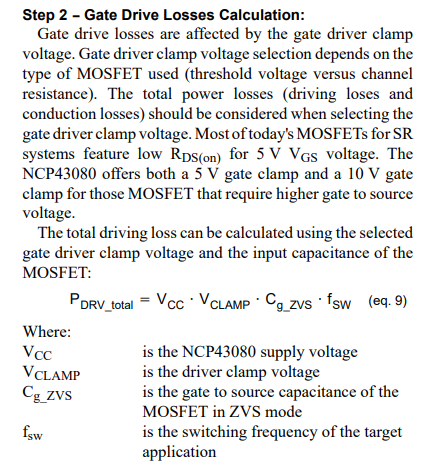

In [201]:
%%render 
V_clamp = 9.5
Vcc = 12
Cg_zvs = CDRV_nF
fsw_max
P_DRV_total = Vcc*V_clamp*Cg_zvs*fsw_max*1e-9 # W


P_DRV_total2 = Vcc*Qg_nc*fsw_max*1e-9 # W

<IPython.core.display.Latex object>